In [4]:
!pip install pyarrow

In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import pyarrow
from pandas import read_parquet
import matplotlib

## 1. tbl_merchants
**Columns**
- merchant_abn
- name
- tags
- revenue_levels
- take_rate

In [8]:
tbl_merchants = pd.read_parquet('../data/tables/tbl_merchants.parquet')

In [9]:
tbl_merchants

,name,tags
merchant_abn,,
10023283211,Felis Limited,"((furniture, home furnishings and equipment sh..."
10142254217,Arcu Ac Orci Corporation,"([cable, satellite, and otHer pay television a..."
10165489824,Nunc Sed Company,"([jewelry, watch, clock, and silverware shops]..."
10187291046,Ultricies Dignissim Lacus Foundation,"([wAtch, clock, and jewelry repair shops], [b]..."
10192359162,Enim Condimentum PC,"([music shops - musical instruments, pianos, a..."
...,...,...
99938978285,Elit Dictum Eu Ltd,"[(opticians, optical goods, and eyeglasses), (..."
99974311662,Mollis LLP,"((books, periodicals, and newspapers), (b), (t..."
99976658299,Sociosqu Corp.,"((shoe shops), (a), (take rate: 6.57))"


In [10]:
tbl_merchants.reset_index().tags[0]

'((furniture, home furnishings and equipment shops, and manufacturers, except appliances), (e), (take rate: 0.18))'

In [11]:
# ETL
# index
tbl_merchants_new = tbl_merchants.reset_index()
# tags
tags_clean = tbl_merchants_new['tags'].str[2:-1].str.replace(')',']').str.replace('(','[').str.replace(']','')
tags_split = tags_clean.str.split('[',expand=True)

tags_final = pd.DataFrame().assign(
    tags = tags_split[0].str.strip().str[:-1],  # delete comma
    revenue_levels = tags_split[1].str.strip().str[:-1],  # delete space and comma
    take_rate = tags_split[2].str.split(':',expand=True)[1].astype(float)
)

# add to dataframe
tbl_merchants_cleaned = tbl_merchants_new.assign(
    tags = tags_final['tags'],  
    revenue_levels = tags_final['revenue_levels'],  
    take_rate = tags_final['take_rate']
)

C:\Users\HP\AppData\Local\Temp\ipykernel_113188\3250096525.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tags_clean = tbl_merchants_new['tags'].str[2:-1].str.replace(')',']').str.replace('(','[').str.replace(']','')


In [12]:
tbl_merchants_cleaned

,merchant_abn,name,tags,revenue_levels,take_rate
0,10023283211,Felis Limited,"furniture, home furnishings and equipment shop...",e,0.18
1,10142254217,Arcu Ac Orci Corporation,"cable, satellite, and otHer pay television and...",b,4.22
2,10165489824,Nunc Sed Company,"jewelry, watch, clock, and silverware shops",b,4.40
3,10187291046,Ultricies Dignissim Lacus Foundation,"wAtch, clock, and jewelry repair shops",b,3.29
4,10192359162,Enim Condimentum PC,"music shops - musical instruments, pianos, and...",a,6.33
...,...,...,...,...,...
4021,99938978285,Elit Dictum Eu Ltd,"opticians, optical goods, and eyeglasses",b,4.50
4022,99974311662,Mollis LLP,"books, periodicals, and newspapers",b,3.17
4023,99976658299,Sociosqu Corp.,shoe shops,a,6.57
4024,99987905597,Commodo Hendrerit LLC,motor vehicle Supplies and new parts,a,6.82


## 2. transaction
**Columns**
- user_id
- merchant_abn
- dollar_value
- order_id
- date

In [13]:
from datetime import datetime 
import datetime as dt
data_started = datetime.strptime('2021-02-28', '%Y-%m-%d') # start date of data
data_ended = datetime.strptime('2021-08-27', '%Y-%m-%d') # end date of data

transaction = pd.DataFrame() # store the data
date_i = datetime.strptime('2021-02-28', '%Y-%m-%d')

while date_i <= data_ended:
    data = pd.read_parquet('../data/tables/transactions_20210228_20210827_snapshot/order_datetime={}'.format(
        date_i.strftime("%Y-%m-%d")))  ## collect the daily transaction data
    
    data['date'] = date_i
    
    transaction = pd.concat([transaction,data],axis = 0)
    if date_i.day == 1:
        print(date_i.strftime("%Y-%m-%d"),'done!')
    date_i += dt.timedelta(days=1)


2021-03-01 done!
2021-04-01 done!
2021-05-01 done!
2021-06-01 done!
2021-07-01 done!
2021-08-01 done!


In [14]:
transaction

,user_id,merchant_abn,dollar_value,order_id,date
0,1,28000487688,133.226894,0c37b3f7-c7f1-48cb-bcc7-0a58e76608ea,2021-02-28
1,18485,62191208634,79.131400,9e18b913-0465-4fd4-92fd-66d15e65d93c,2021-02-28
2,1,83690644458,30.441348,40a2ff69-ea34-4657-8429-df7ca957d6a1,2021-02-28
3,18488,39649557865,962.813341,f4c1a5ae-5b76-40d0-ae0f-cb9730ac325a,2021-02-28
4,2,80779820715,48.123977,cd09bdd6-f56d-489f-81ea-440f4bda933c,2021-02-28
...,...,...,...,...,...
23197,18470,29323795999,8.346682,f35299fa-c9f4-408e-bb86-b9d5fff65a9a,2021-08-27
23198,18471,21359184622,97.760164,8ed0f865-9f70-4e20-8266-81904c95de89,2021-08-27
23199,18472,21807339153,54.310599,3251ce95-a850-4fbc-98d0-32bce1651d40,2021-08-27
23200,18475,41944909975,103.804012,bd52416a-a7f1-4293-ae96-cc4a8392e414,2021-08-27


## 3. tbl_consumer
**Columns**
- name
- address
- state
- postcode
- gender
- consumer_id

In [15]:
tbl_consumer = pd.read_csv('../data/tables/tbl_consumer.csv',sep='|')

In [16]:
tbl_consumer

,name,address,state,postcode,gender,consumer_id
0,Yolanda Williams,413 Haney Gardens Apt. 742,WA,6935,Female,1195503
1,Mary Smith,3764 Amber Oval,NSW,2782,Female,179208
2,Jill Jones MD,40693 Henry Greens,NT,862,Female,1194530
3,Lindsay Jimenez,00653 Davenport Crossroad,NSW,2780,Female,154128
4,Rebecca Blanchard,9271 Michael Manors Suite 651,WA,6355,Female,712975
...,...,...,...,...,...,...
499994,Jessica Avila,508 Miranda Overpass Apt. 218,QLD,4400,Female,1385608
499995,Steven Thornton,7913 Schwartz Mission Suite 483,VIC,3097,Undisclosed,1466964
499996,Christy Smith,5681 Zachary Mountain Apt. 060,NSW,2756,Undisclosed,1253484
499997,Donna Sutton,54140 Jacob Point,VIC,3989,Female,175005


In [17]:
consumer_user_details = pd.read_parquet('../data/tables/consumer_user_details.parquet')

In [18]:
consumer_user_details

,user_id,consumer_id
0,1,1195503
1,2,179208
2,3,1194530
3,4,154128
4,5,712975
...,...,...
499994,499995,1385608
499995,499996,1466964
499996,499997,1253484
499997,499998,175005


## 4. new_transaction
**Columns**
- user_id
- merchant_abn
- dollar_value
- order_id
- date

In [19]:
from datetime import datetime 
import datetime as dt
data_started = datetime.strptime('2021-08-28', '%Y-%m-%d') # start date of data
data_ended = datetime.strptime('2022-02-27', '%Y-%m-%d') # end date of data

transaction_new = pd.DataFrame() # store the data
date_i = datetime.strptime('2021-08-28', '%Y-%m-%d')

while date_i <= data_ended:
    data = pd.read_parquet('../data/tables/transactions_20210828_20220227_snapshot/order_datetime={}'.format(
        date_i.strftime("%Y-%m-%d")))  ## collect the daily transaction data
    
    data['date'] = date_i
    
    transaction_new = pd.concat([transaction_new,data],axis = 0)
    if date_i.day == 1:
        print(date_i.strftime("%Y-%m-%d"),'done!')
    date_i += dt.timedelta(days=1)


2021-09-01 done!
2021-10-01 done!
2021-11-01 done!
2021-12-01 done!
2022-01-01 done!
2022-02-01 done!


In [20]:
transaction_new

,user_id,merchant_abn,dollar_value,order_id,date
0,1,45629217853,43.738115,809b9b93-0a7d-4627-abd8-b6899d13f169,2021-08-28
1,14936,24852446429,9.788472,5a04b94c-c553-47c6-b99b-a9697b977984,2021-08-28
2,3,32656335530,100.160247,8776872a-a340-46ff-84c8-a024453ff8c3,2021-08-28
3,14936,72472909171,28.540345,e997036a-1418-44c6-8629-6691a2975297,2021-08-28
4,4,86223953880,313.021668,6161bda6-030c-42c0-8bd6-9067f18d4223,2021-08-28
...,...,...,...,...,...
20773,14931,94455880010,93.759048,29584323-55f2-4e3c-82b4-6c2f4a8d729e,2022-02-27
20774,14931,35755909141,124.307113,300b907e-f902-4f48-a809-7662cb118885,2022-02-27
20775,14931,79417999332,131.169882,1c44d278-5346-4311-b78c-94b3dc5b6e2c,2022-02-27
20776,14932,46804135891,37.889414,3abc2a93-8be3-461b-9754-40152b0451bf,2022-02-27


In [21]:
## Description
transaction_new.groupby('user_id').count().sort_values(by = 'order_id',ascending= False) ## 

,merchant_abn,dollar_value,order_id,date
user_id,,,,
14596,231,231,231,231
22883,229,229,229,229
8302,228,228,228,228
5793,228,228,228,228
19933,227,227,227,227
...,...,...,...,...
20831,148,148,148,148
1212,147,147,147,147
7190,147,147,147,147


## Merge
- **primary key** & *foreign key*
- tbl_merchants_cleaned：***merchant_abn***｜	name	｜tags｜	revenue_levels	take_rate
- transaction_new：*user_id* ｜	*merchant_abn*	｜dollar_value｜	**order_id**	｜date
- tbl_consumer：name	｜address	｜state	｜postcode｜	gender｜	***consumer_id***
- consumer_user_details：***user_id***	｜***consumer_id***

- data from  **concumer has「499,999」，consumer produced  orders which totally have 「4,508,106」**

In [22]:
merge_1 = pd.merge(tbl_consumer,consumer_user_details,on='consumer_id',how = 'left')
merge_1

,name,address,state,postcode,gender,consumer_id,user_id
0,Yolanda Williams,413 Haney Gardens Apt. 742,WA,6935,Female,1195503,1
1,Mary Smith,3764 Amber Oval,NSW,2782,Female,179208,2
2,Jill Jones MD,40693 Henry Greens,NT,862,Female,1194530,3
3,Lindsay Jimenez,00653 Davenport Crossroad,NSW,2780,Female,154128,4
4,Rebecca Blanchard,9271 Michael Manors Suite 651,WA,6355,Female,712975,5
...,...,...,...,...,...,...,...
499994,Jessica Avila,508 Miranda Overpass Apt. 218,QLD,4400,Female,1385608,499995
499995,Steven Thornton,7913 Schwartz Mission Suite 483,VIC,3097,Undisclosed,1466964,499996
499996,Christy Smith,5681 Zachary Mountain Apt. 060,NSW,2756,Undisclosed,1253484,499997
499997,Donna Sutton,54140 Jacob Point,VIC,3989,Female,175005,499998


In [23]:
merge_2 = pd.merge(transaction_new, merge_1,on='user_id',how = 'left')
merge_2

,user_id,merchant_abn,dollar_value,order_id,date,name,address,state,postcode,gender,consumer_id
0,1,45629217853,43.738115,809b9b93-0a7d-4627-abd8-b6899d13f169,2021-08-28,Yolanda Williams,413 Haney Gardens Apt. 742,WA,6935,Female,1195503
1,14936,24852446429,9.788472,5a04b94c-c553-47c6-b99b-a9697b977984,2021-08-28,Maria Riley,416 Phillip View Suite 130,SA,5157,Female,986886
2,3,32656335530,100.160247,8776872a-a340-46ff-84c8-a024453ff8c3,2021-08-28,Jill Jones MD,40693 Henry Greens,NT,862,Female,1194530
3,14936,72472909171,28.540345,e997036a-1418-44c6-8629-6691a2975297,2021-08-28,Maria Riley,416 Phillip View Suite 130,SA,5157,Female,986886
4,4,86223953880,313.021668,6161bda6-030c-42c0-8bd6-9067f18d4223,2021-08-28,Lindsay Jimenez,00653 Davenport Crossroad,NSW,2780,Female,154128
...,...,...,...,...,...,...,...,...,...,...,...
4508101,14931,94455880010,93.759048,29584323-55f2-4e3c-82b4-6c2f4a8d729e,2022-02-27,Victoria Burton,68380 Krause Ranch Suite 756,QLD,4627,Female,363380
4508102,14931,35755909141,124.307113,300b907e-f902-4f48-a809-7662cb118885,2022-02-27,Victoria Burton,68380 Krause Ranch Suite 756,QLD,4627,Female,363380
4508103,14931,79417999332,131.169882,1c44d278-5346-4311-b78c-94b3dc5b6e2c,2022-02-27,Victoria Burton,68380 Krause Ranch Suite 756,QLD,4627,Female,363380
4508104,14932,46804135891,37.889414,3abc2a93-8be3-461b-9754-40152b0451bf,2022-02-27,Allison Carpenter,32526 Moore Throughway Apt. 573,QLD,4105,Undisclosed,694139


In [24]:
merge_3 = pd.merge(merge_2,tbl_merchants_cleaned,on='merchant_abn',how = 'left')
merge_3

,user_id,merchant_abn,dollar_value,order_id,date,name_x,address,state,postcode,gender,consumer_id,name_y,tags,revenue_levels,take_rate
0,1,45629217853,43.738115,809b9b93-0a7d-4627-abd8-b6899d13f169,2021-08-28,Yolanda Williams,413 Haney Gardens Apt. 742,WA,6935,Female,1195503,Lacus Consulting,"gift, Card, novelty, and souvenir shops",a,6.98
1,14936,24852446429,9.788472,5a04b94c-c553-47c6-b99b-a9697b977984,2021-08-28,Maria Riley,416 Phillip View Suite 130,SA,5157,Female,986886,Erat Vitae LLP,"florists supplies, nursery stock, and floWers",c,2.94
2,3,32656335530,100.160247,8776872a-a340-46ff-84c8-a024453ff8c3,2021-08-28,Jill Jones MD,40693 Henry Greens,NT,862,Female,1194530,Enim Etiam Gravida PC,"gift, card, novelty, and souveniR shops",b,3.92
3,14936,72472909171,28.540345,e997036a-1418-44c6-8629-6691a2975297,2021-08-28,Maria Riley,416 Phillip View Suite 130,SA,5157,Female,986886,Nullam Consulting,"digiTal goods: books, movies, music",a,6.33
4,4,86223953880,313.021668,6161bda6-030c-42c0-8bd6-9067f18d4223,2021-08-28,Lindsay Jimenez,00653 Davenport Crossroad,NSW,2780,Female,154128,Libero Et Inc.,"computer programming , data processing, and in...",c,1.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508101,14931,94455880010,93.759048,29584323-55f2-4e3c-82b4-6c2f4a8d729e,2022-02-27,Victoria Burton,68380 Krause Ranch Suite 756,QLD,4627,Female,363380,Nunc Sit LLC,"computer programming , datA procEssing, and in...",a,6.33
4508102,14931,35755909141,124.307113,300b907e-f902-4f48-a809-7662cb118885,2022-02-27,Victoria Burton,68380 Krause Ranch Suite 756,QLD,4627,Female,363380,Tristique Neque Venenatis Associates,"furniture, home furnishings and eqUipment shop...",b,4.16
4508103,14931,79417999332,131.169882,1c44d278-5346-4311-b78c-94b3dc5b6e2c,2022-02-27,Victoria Burton,68380 Krause Ranch Suite 756,QLD,4627,Female,363380,Phasellus At Company,"gift, card, novelty, and souvenIr shops",b,4.95
4508104,14932,46804135891,37.889414,3abc2a93-8be3-461b-9754-40152b0451bf,2022-02-27,Allison Carpenter,32526 Moore Throughway Apt. 573,QLD,4105,Undisclosed,694139,Suspendisse Dui Corporation,"opticians, optical goods, and eyeglasses",c,2.93


In [25]:
# basic information
merge_3['user_id'] = merge_3['user_id'].astype('str')
merge_3['merchant_abn'] = merge_3['merchant_abn'].astype('str')
merge_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4508106 entries, 0 to 4508105
Data columns (total 15 columns):
 #   Column          Dtype         
---  ------          -----         
 0   user_id         object        
 1   merchant_abn    object        
 2   dollar_value    float64       
 3   order_id        object        
 4   date            datetime64[ns]
 5   name_x          object        
 6   address         object        
 7   state           object        
 8   postcode        int64         
 9   gender          object        
 10  consumer_id     int64         
 11  name_y          object        
 12  tags            object        
 13  revenue_levels  object        
 14  take_rate       float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(10)
memory usage: 550.3+ MB


In [26]:
## continue variable 
merge_3[['dollar_value','take_rate']].describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
dollar_value,4508106.0,166.40,520.15,0.0,26.12,62.29,150.42,77320.87
take_rate,4323692.0,4.59,1.74,0.1,3.05,4.78,6.16,7.00


- **The dispersion of dollar_value is serious, the maximum value is 77320, but the 75% quantile is only 150.42.**

<AxesSubplot:>

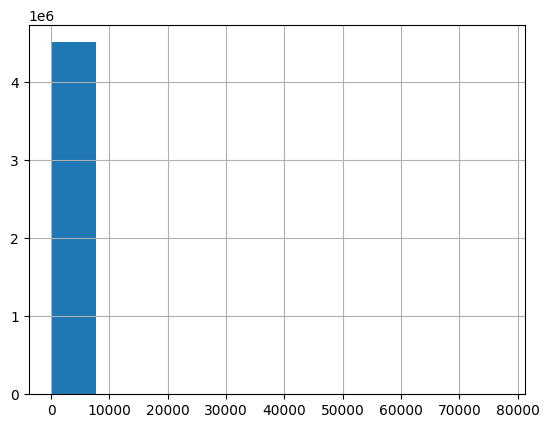

In [27]:
# distribution
merge_3['dollar_value'].hist()

<AxesSubplot:>

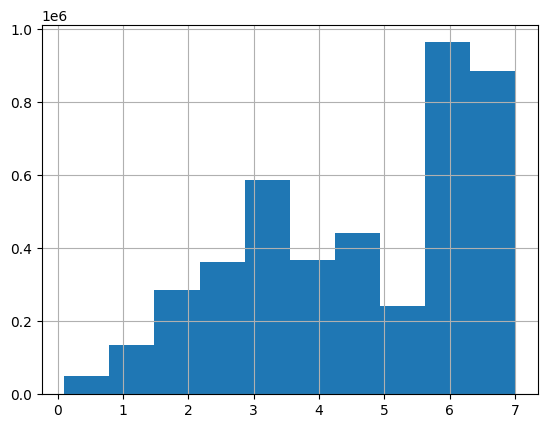

In [28]:
# distribution
merge_3['take_rate'].hist()

In [29]:
merge_3['dollar_value'].sort_values()

2090955        0.000007
3251609        0.000025
825805         0.000026
760959         0.000077
1758798        0.000102
               ...     
4355696    50209.505439
1203109    51876.637564
1153407    56552.394443
2788865    67706.740191
3094726    77320.869803
Name: dollar_value, Length: 4508106, dtype: float64

In [30]:
merge_3['take_rate'].unique()

array([6.98, 2.94, 3.92, 6.33, 1.84, 2.42, 6.18, 3.59, 1.57, 4.64, 5.8 ,
       6.61, 4.87, 6.1 , 3.81, 2.68,  nan, 4.7 , 4.41, 2.86, 1.88, 5.05,
       4.31, 4.69, 3.17, 4.46, 6.31, 6.13, 3.5 , 5.97, 5.1 , 4.16, 6.55,
       2.72, 6.77, 1.47, 3.43, 5.52, 3.88, 6.15, 4.93, 6.48, 3.15, 6.7 ,
       3.41, 6.37, 5.56, 6.09, 2.04, 1.52, 5.65, 3.71, 3.49, 6.  , 4.77,
       5.93, 5.71, 6.74, 6.42, 3.05, 6.22, 6.81, 6.43, 6.86, 4.91, 4.95,
       5.53, 6.78, 4.47, 3.3 , 6.35, 5.07, 2.48, 5.68, 5.72, 4.8 , 4.07,
       2.73, 6.01, 5.51, 6.41, 1.94, 2.62, 5.94, 6.39, 6.26, 5.64, 6.38,
       4.81, 0.56, 6.58, 5.76, 2.93, 0.22, 1.04, 3.44, 3.74, 6.99, 5.09,
       6.59, 6.64, 5.77, 1.89, 1.91, 5.99, 6.16, 2.88, 3.72, 2.69, 3.83,
       3.84, 6.72, 6.34, 2.5 , 5.88, 4.08, 1.86, 4.45, 2.03, 5.98, 2.91,
       5.66, 3.36, 6.9 , 4.02, 0.38, 1.78, 3.27, 3.24, 5.9 , 5.95, 3.68,
       5.82, 3.04, 6.24, 6.54, 5.89, 6.69, 3.76, 1.44, 6.6 , 5.03, 6.57,
       3.91, 3.85, 2.06, 6.02, 0.24, 1.13, 4.52, 4.

In [31]:

merge_3.isnull().sum()

user_id                0
merchant_abn           0
dollar_value           0
order_id               0
date                   0
name_x                 0
address                0
state                  0
postcode               0
gender                 0
consumer_id            0
name_y            184414
tags              184414
revenue_levels    184414
take_rate         184414
dtype: int64

In [32]:

missing_rate = round(184414/4508106,4)
missing_rate

0.0409

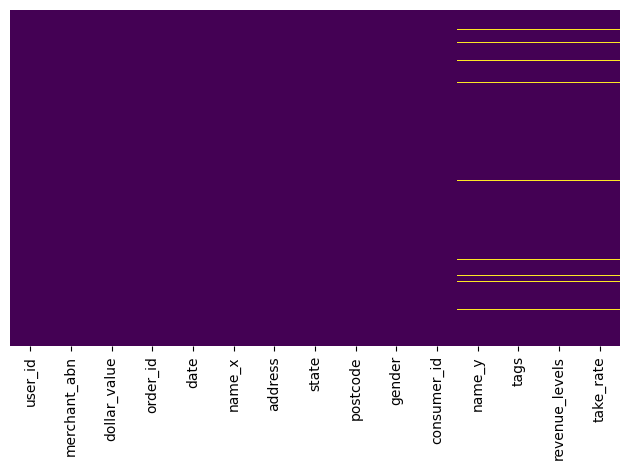

In [33]:
import seaborn
import matplotlib.pyplot as plt
seaborn.heatmap(merge_3.isnull(), yticklabels=False, cbar=False, cmap='viridis')

plt.tight_layout() 
plt.show()

<AxesSubplot:>

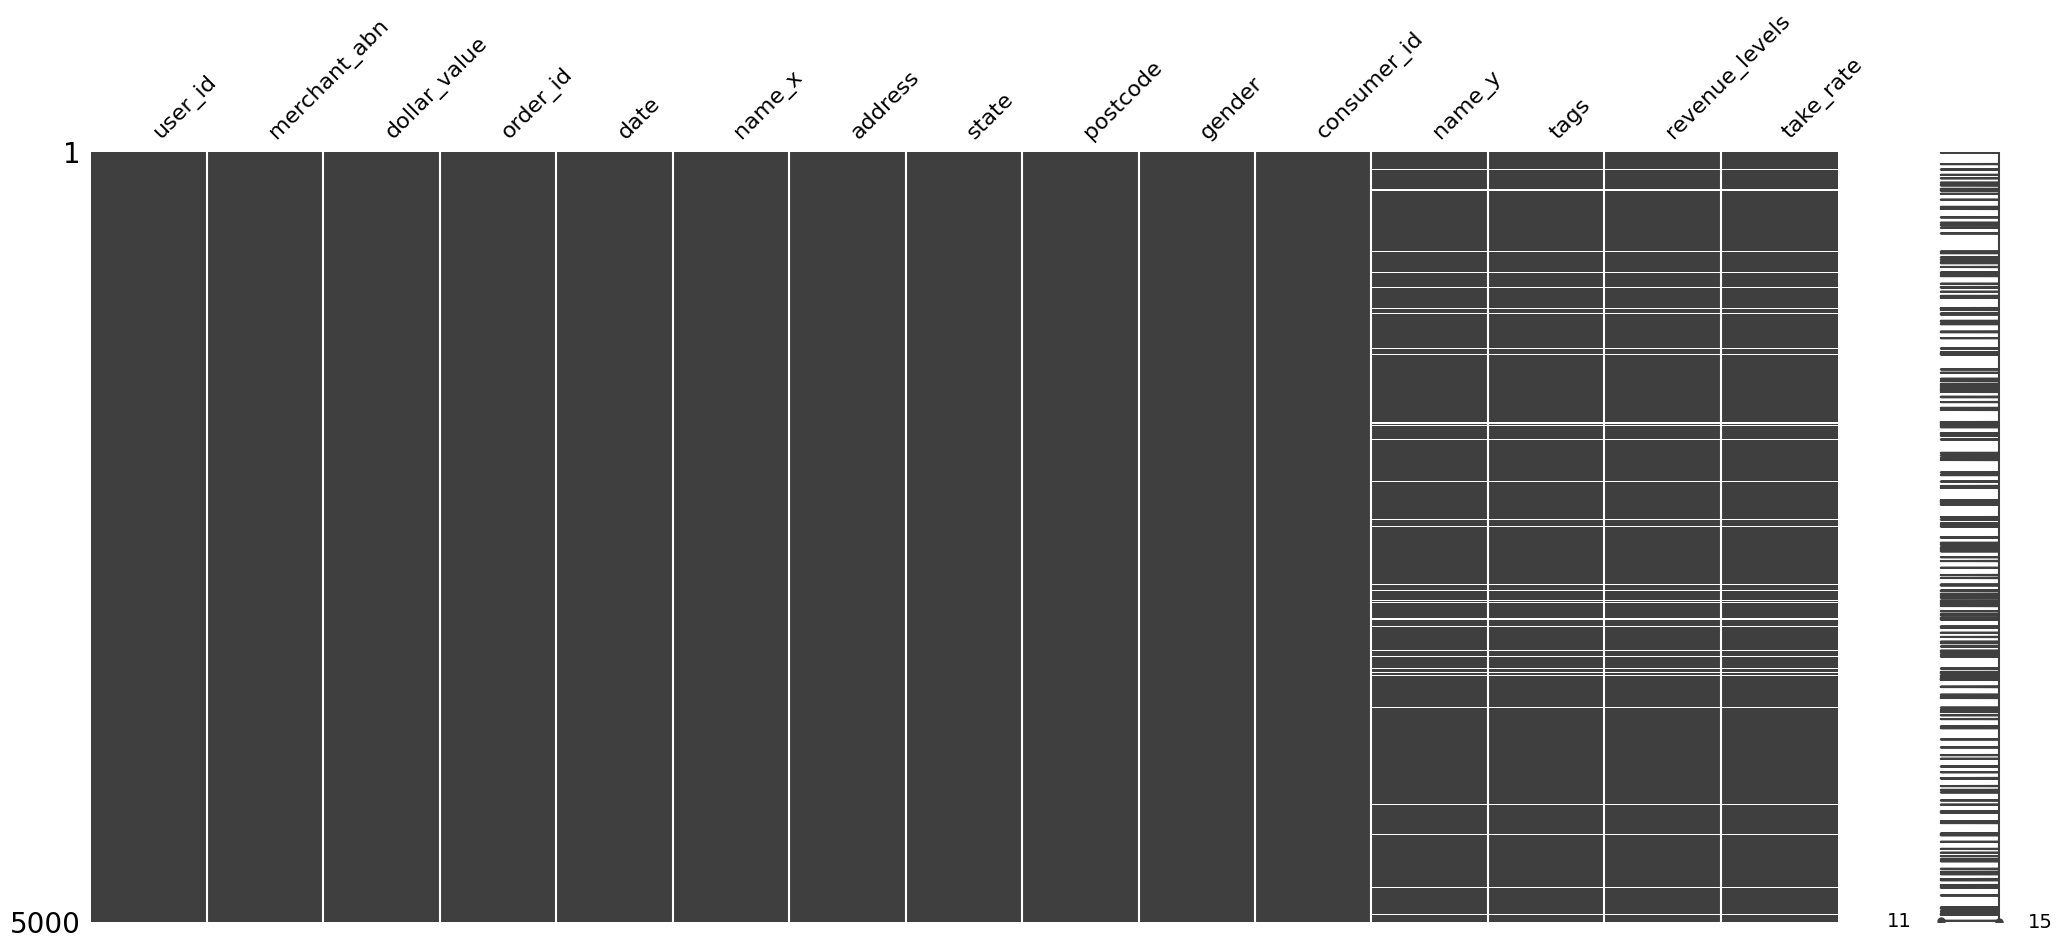

In [34]:
 !pip install missingno
import missingno as msno


msno.matrix  
msno.matrix(merge_3.sample(5000))

- from the data, merchant_name,tags,revenue_levels & take_rate have the missing values, those are from the data of tbl_merchants, which need to be verified.

In [35]:
# check the abnormal value
merge_3[merge_3.name_y.isnull()]

,user_id,merchant_abn,dollar_value,order_id,date,name_x,address,state,postcode,gender,consumer_id,name_y,tags,revenue_levels,take_rate
16,14,43820812476,163.617003,62175fef-d6f5-4bcc-a17b-31c617ca40f3,2021-08-28,Lance Butler,8943 Kenneth Camp,VIC,3332,Male,1343547,NaN,NaN,NaN,NaN
27,14949,32234779638,78.340662,9f717f37-da06-4f47-abbf-cad670b3518f,2021-08-28,Charles Mendoza,7257 Deborah Pike Suite 753,VIC,3533,Male,816111,NaN,NaN,NaN,NaN
42,34,29323795999,23.351839,5aadaf04-9f0f-4d4d-96a5-e14dc131871a,2021-08-28,Dakota Kelley,328 Manning Summit Apt. 216,NSW,2823,Male,773039,NaN,NaN,NaN,NaN
107,15000,53997373109,327.125541,578c3c42-21b2-4225-ab1c-cf78ae7bc188,2021-08-28,Jose Adams,7154 Wright Hollow,VIC,3102,Male,691041,NaN,NaN,NaN,NaN
141,15021,57959696529,2008.250733,33498d8b-09ce-4b54-bdc5-25be3977f4b2,2021-08-28,Cynthia Cervantes,72523 Miller Radial Apt. 738,NSW,2029,Female,665368,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508000,14810,95492562735,214.227392,fb7bae0c-46d1-431a-827f-efff9d37c583,2022-02-27,Dr. Amanda James DVM,37690 Walker Flats,WA,6961,Female,671807,NaN,NaN,NaN,NaN
4508066,14880,67330176930,101.096921,236bfc74-e3ed-4548-924c-cc48154cf80c,2022-02-27,John Fisher,33409 Jones Meadows,VIC,3062,Male,781402,NaN,NaN,NaN,NaN
4508071,14888,91848160033,42.700690,c63c4ea9-7b61-495b-b5b5-a2e81ab47dc4,2022-02-27,Terri Little,2376 Gina Lights Suite 896,VIC,3052,Female,590354,NaN,NaN,NaN,NaN
4508084,14902,32234779638,87.401381,d477c76a-6997-4022-8d34-da9becd9beb2,2022-02-27,Julie Rowe,95947 Flores Run,NSW,1036,Undisclosed,1346423,NaN,NaN,NaN,NaN


In [36]:
merge_3[merge_3.name_y.isnull()]['merchant_abn'].unique().shape # miss 381 records.

(381,)

In [37]:
merge_3['state'].value_counts()

NSW    1301083
VIC    1040906
WA      713271
QLD     667956
SA      512386
TAS     167178
NT       64224
ACT      41102
Name: state, dtype: int64

<BarContainer object of 8 artists>

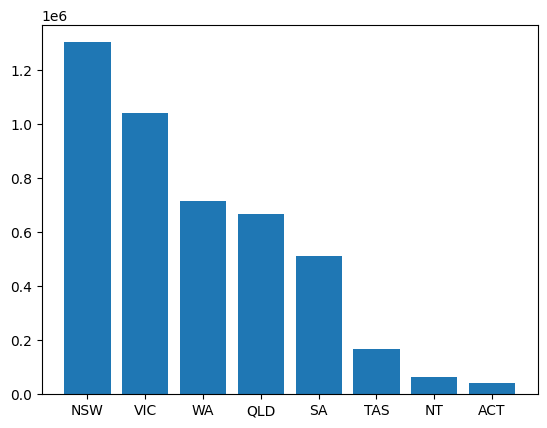

In [38]:
plt.bar(merge_3['state'].value_counts().index,merge_3['state'].value_counts().values)

In [39]:
merge_3['dollar_value'].value_counts() ## most of price is 157,other price is not identical. 

157.000000    12723
43.738115         1
16.101388         1
153.134522        1
53.212105         1
              ...  
6.331250          1
3.409148          1
50.486093         1
155.170182        1
196.988323        1
Name: dollar_value, Length: 4495384, dtype: int64

In [40]:
## delelt the null value and empty value 
import numpy as np
clean = merge_3.copy()
dollar_data = clean.dollar_value
q1 = np.percentile(dollar_data,25)
q3 = np.percentile(dollar_data,75)
iqr = q3-q1
clean= clean[(clean.dollar_value >= q1-iqr) & (clean.dollar_value <= q3+iqr)]

<AxesSubplot:>

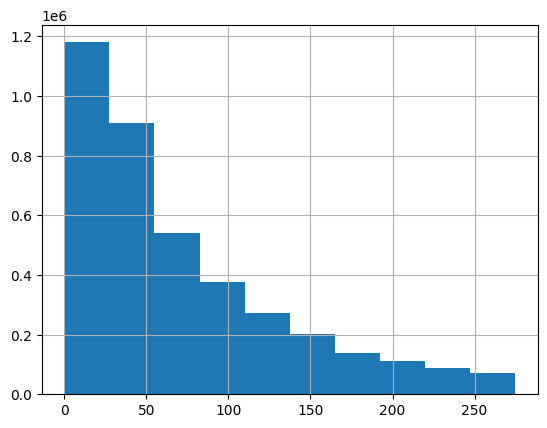

In [41]:
clean['dollar_value'].hist() 

<AxesSubplot:>

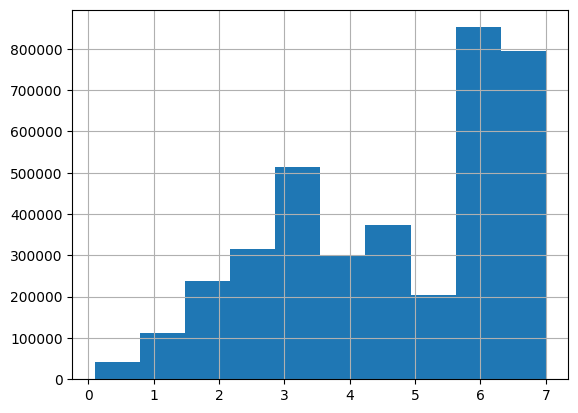

In [42]:
clean['take_rate'].hist()

In [43]:
take_rate_data = clean.take_rate.dropna()
q1 = np.percentile(take_rate_data,25)
q3 = np.percentile(take_rate_data,75)
iqr = q3-q1
clean = clean[(clean.take_rate >= q1-iqr) & (clean.take_rate <= q3+iqr)]

<AxesSubplot:>

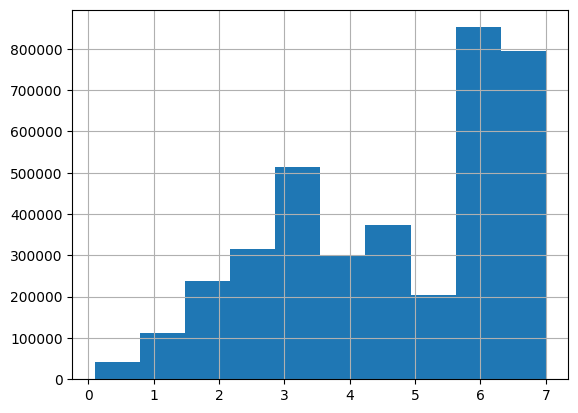

In [44]:
clean['take_rate'].hist()

In [45]:
clean = clean.dropna().drop_duplicates()

array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'merchant_abn'}>],
       [<AxesSubplot:title={'center':'dollar_value'}>,
        <AxesSubplot:title={'center':'date'}>]], dtype=object)

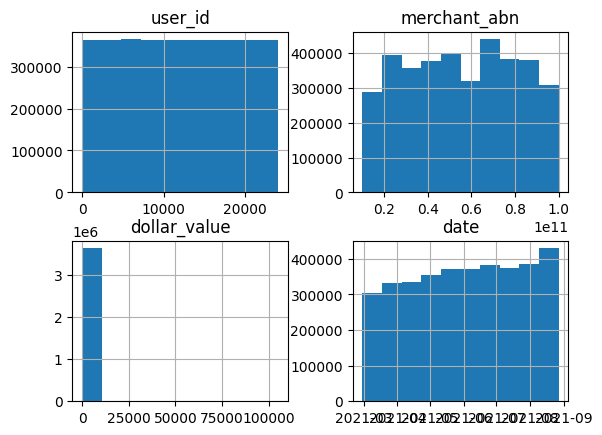

In [47]:
transaction=transaction[transaction.merchant_abn.apply(lambda x: len(str(x))==11)]

array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'merchant_abn'}>],
       [<AxesSubplot:title={'center':'dollar_value'}>,
        <AxesSubplot:title={'center':'date'}>]], dtype=object)

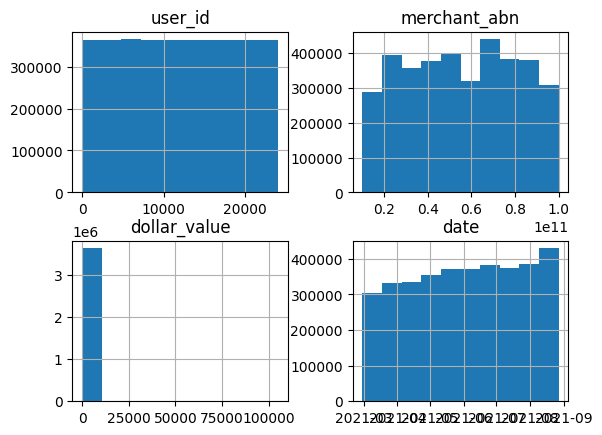

In [49]:
transaction.hist()